In [179]:
from pathlib import Path

figures_path = Path("figures")
figures_path.mkdir(exist_ok=True)
figures_path = figures_path / "fusion_score"
figures_path.mkdir(exist_ok=True)


FONTSIZE_TICKS = 14
LINEWIDTH_SCORES = 2.5

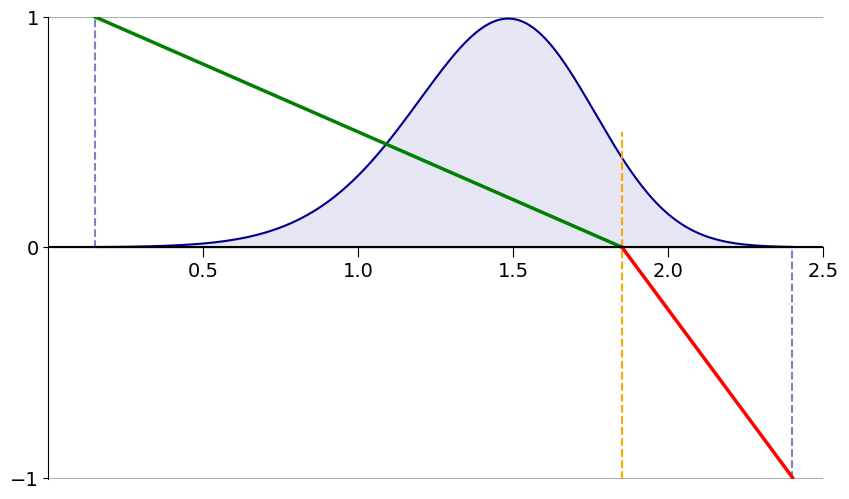

In [188]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skewnorm

# Parameters for the skew-normal distribution
location = 1.7   # Location (shifts the peak)
scale = 0.4      # Scale (controls the width)
alpha = -1.5      # Skewness parameter (negative for left skew)

# Generate data
x_lim_min_plot = 0
x_lim_max_plot = 2.5
x_lim_min = x_lim_min_plot + 0.15
x_lim_max = x_lim_max_plot - 0.1

x = np.linspace(x_lim_min, x_lim_max, 1000)
y = skewnorm.pdf(x, alpha, location, scale)
y /= y.max() + 0.01  # Normalize

# Threshold line
threshold = 1.85

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, color='darkblue')
plt.axvline(x=threshold, color='orange', linestyle='--', ymax=0.75)  # Threshold line adjusted
# Calculate the X max of the curve
x_min = x[0]
x_max = x[-1]
plt.axvline(x=x_min, color='darkblue', linestyle='--', ymin=0.5, ymax=1, alpha=0.5)  # Threshold line adjusted
plt.axvline(x=x_max, color='darkblue', linestyle='--', ymax=0.5, alpha=0.5)  # Threshold line adjusted

# Draw additional lines
plt.plot([x_lim_min, threshold], [1, 0], color='green', linestyle='-', linewidth=LINEWIDTH_SCORES)  # Line from (0,1) to (threshold,0)
plt.plot([threshold, x_lim_max], [0, -1], color='red', linestyle='-', linewidth=LINEWIDTH_SCORES)  # Line from (threshold,0) to (2.3,-1)

# Fill under the curve
plt.fill_between(x, y, color="darkblue", alpha=0.1) 

# Setting axis properties. Set X and Y ticks fontsize. Set Y to [-1, 0, 1]. From X ticks, remove the 0.
plt.xlim(x_lim_min_plot, x_lim_max_plot)
plt.ylim(-1.005, 1.001)
plt.yticks([-1, 0, 1], fontsize=FONTSIZE_TICKS)  # Set y-ticks and fontsize
plt.xticks(fontsize=FONTSIZE_TICKS)  # Set x-ticks and fontsize



# Correcting grid visibility and show x-axis ticks
plt.grid(True, axis='y')  # Enable grid only on the y-axis
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, size=FONTSIZE_TICKS*0.5)  # Show x-tick lines

# Adjust the x-axis to stay at y=0 and make y-axis visible
plt.axhline(y=0, color='black', linewidth=1.5)  # X-axis line
plt.gca().spines['bottom'].set_position('zero')  # Position x-axis at y=0
plt.gca().spines['left'].set_visible(True)  # Make the left spine visible
plt.gca().spines['top'].set_visible(False)  # Hide the top spine
plt.gca().spines['right'].set_visible(False)  # Hide the right spine

# Adjust x-ticks to remove zero
xticks = plt.gca().get_xticks()
xticks = xticks[xticks != 0]  # Remove zero from x-ticks
plt.xticks(xticks, fontsize=FONTSIZE_TICKS)  # Set x-ticks and fontsize

plt.savefig(figures_path / 'fusion_score_feature.pdf', bbox_inches='tight')
plt.savefig(figures_path / 'fusion_score_feature.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()



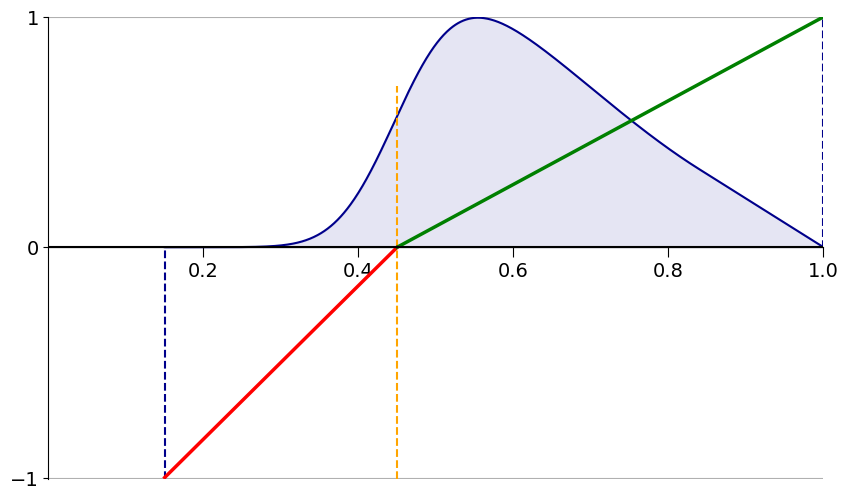

In [187]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skewnorm

# Generate data
offset = 0.15
x_lim_min_plot = 0
x_lim_max_plot = 1
x_lim_min = x_lim_min_plot + offset
x_lim_max = x_lim_max_plot
x = np.linspace(x_lim_min, x_lim_max, 1000)

# Approach 2: Skewed normal
alpha = 4
location = 0.45
scale = 0.25
y = skewnorm.pdf(x, alpha, location, scale)
y /= y.max() + 0.01  # Normalize

# Make y between x=0.85 and x=1 be a linear function from the value of y at x=0.85 to 0
x_from = 0.85
x_to = 1
x_values_from_to = x[(x >= x_from) & (x <= x_to)]
y_values_from_to = y[(x >= x_from) & (x <= x_to)]
slope = (0 - y_values_from_to[0]) / (x_to - x_from)
y[(x >= x_from) & (x <= x_to)] = slope * (x_values_from_to - x_from) + y_values_from_to[0]

# Threshold line
threshold = 0.45

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, color='darkblue')
plt.axvline(x=threshold, color='orange', linestyle='--', ymax=0.85)  # Threshold line adjusted
# Calculate the X max of the curve
x_min = x[0]
x_max = x[-1]
plt.axvline(x=x_min, color='darkblue', linestyle='--', ymin=0, ymax=0.5)  # Threshold line adjusted
plt.axvline(x=x_max, color='darkblue', linestyle='--', ymin=0.5, ymax=1)

# Draw additional lines
plt.plot([x_lim_min, threshold], [-1, 0], color='red', linestyle='-', linewidth=LINEWIDTH_SCORES)  # Line from (0,1) to (threshold,0)
plt.plot([threshold, x_lim_max], [0, 1], color='green', linestyle='-', linewidth=LINEWIDTH_SCORES)  # Line from (threshold,0) to (2.3,-1)

# Fill under the curve
plt.fill_between(x, y, color="darkblue", alpha=0.1) 

# Setting axis properties. Set X and Y ticks fontsize. Set Y to [-1, 0, 1]. From X ticks, remove the 0.
plt.xlim(x_lim_min_plot, x_lim_max_plot)
plt.ylim(-1.005, 1.001)
plt.yticks([-1, 0, 1], fontsize=FONTSIZE_TICKS)  # Set y-ticks and fontsize

# Correcting grid visibility and show x-axis ticks
plt.grid(True, axis='y')  # Enable grid only on the y-axis
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, size=FONTSIZE_TICKS*0.5)  # Show x-tick lines

# Adjust the x-axis to stay at y=0 and make y-axis visible
plt.axhline(y=0, color='black', linewidth=1.5)  # X-axis line
plt.gca().spines['bottom'].set_position('zero')  # Position x-axis at y=0
plt.gca().spines['left'].set_visible(True)  # Make the left spine visible
plt.gca().spines['top'].set_visible(False)  # Hide the top spine
plt.gca().spines['right'].set_visible(False)  # Hide the right spine

# Adjust x-ticks to remove zero
xticks = plt.gca().get_xticks()
xticks = xticks[xticks != 0]  # Remove zero from x-ticks
plt.xticks(xticks, fontsize=FONTSIZE_TICKS)  # Set x-ticks and fontsize

plt.savefig(figures_path / 'fusion_score_logits.pdf', bbox_inches='tight')
plt.savefig(figures_path / 'fusion_score_logits.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()



In [164]:
x_from = 0.85
x_to = 1
x_values_from_to = x[(x >= x_from) & (x <= x_to)]

In [ ]:
# Other options

# # Define the exponential function y = a * exp(b * x)
# a = 1  # Scaling factor adjusted so that y starts from 0
# b = 3  # Adjust b to make sure the curve reaches near 1 at x=1
# y = a * (np.exp(b * x) - 1) / (np.exp(b) - 1)  # Normalize to ensure y is in [0,1]

# # Approach 1: Adjusted Exponential Function
# # Parameters
# c = 0.18  # Adjust this to control where the growth starts
# b = 4   # Growth rate
# y = (np.exp(b * (x - c)) - 1) / (np.exp(b * (1 - c)) - 1)
# y[x < c] = 0  # Ensuring Y is zero before X = c


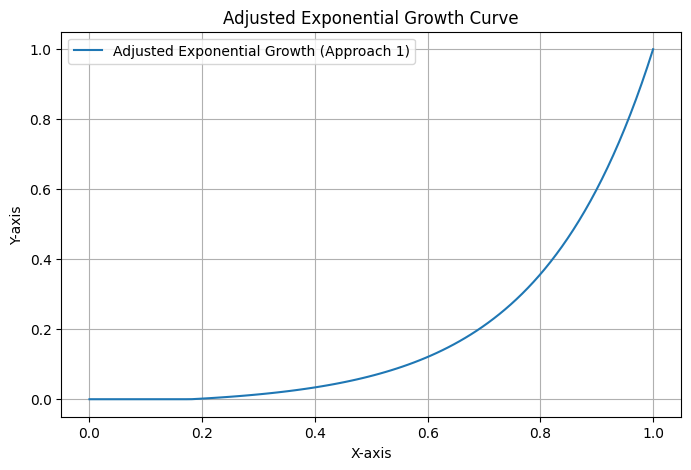

In [137]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range for x
x = np.linspace(0, 1, 100)

# Parameters
c = 0.18  # Adjust this to control where the growth starts
b = 5   # Growth rate

# Approach 1: Adjusted Exponential Function
y1 = (np.exp(b * (x - c)) - 1) / (np.exp(b * (1 - c)) - 1)
y1[x < c] = 0  # Ensuring Y is zero before X = c

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(x, y1, label='Adjusted Exponential Growth (Approach 1)')
plt.title('Adjusted Exponential Growth Curve')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.legend()
plt.show()


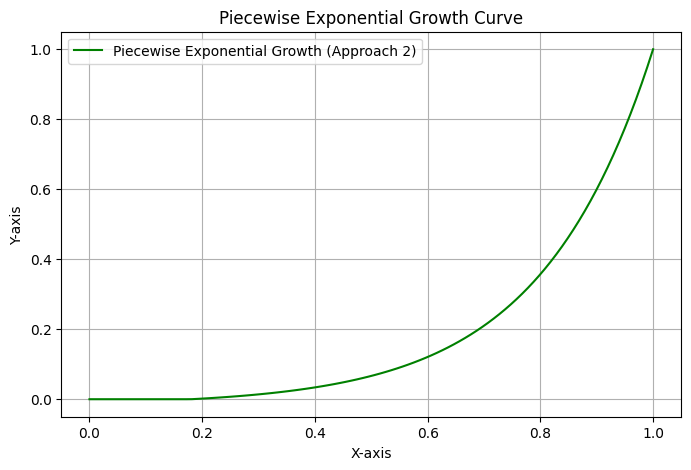

In [136]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range for x
x = np.linspace(0, 1, 100)

# Parameters
c = 0.18  # Point where growth starts
b = 5   # Growth rate

# Approach 2: Piecewise Function
y2 = np.where(x > c, (np.exp(b * (x - c)) - 1) / (np.exp(b * (1 - c)) - 1), 0)

# Create the plot for the piecewise function
plt.figure(figsize=(8, 5))
plt.plot(x, y2, label='Piecewise Exponential Growth (Approach 2)', color='green')
plt.title('Piecewise Exponential Growth Curve')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.legend()
plt.show()
